# Load Data

In [1]:
# Importing libraries used on this project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob as glob

In [2]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [3]:
# Loading all csv files into one object called "files"

files = glob.glob('./data_StatsCan/en_climate_daily_NS_*.csv')
files

# Concatenated all csv files loaded into one DataFrame for analysis

df = pd.concat([pd.read_csv(f, low_memory=False) for f in files], ignore_index=True)
df.head()

Longitude (x)  Latitude (y)               Station Name  Climate ID  \
0          -63.5         44.88  HALIFAX STANFIELD INT'L A     8202250   
1          -63.5         44.88  HALIFAX STANFIELD INT'L A     8202250   
2          -63.5         44.88  HALIFAX STANFIELD INT'L A     8202250   
3          -63.5         44.88  HALIFAX STANFIELD INT'L A     8202250   
4          -63.5         44.88  HALIFAX STANFIELD INT'L A     8202250   

    Date/Time  Year  Month  Day  Data Quality  Max Temp (°C)  ...  \
0  1960-01-01  1960      1    1           NaN            NaN  ...   
1  1960-01-02  1960      1    2           NaN            NaN  ...   
2  1960-01-03  1960      1    3           NaN            NaN  ...   
3  1960-01-04  1960      1    4           NaN            NaN  ...   
4  1960-01-05  1960      1    5           NaN            NaN  ...   

  Total Snow (cm)  Total Snow Flag Total Precip (mm)  Total Precip Flag  \
0             NaN              NaN               NaN                NaN   
1             NaN              NaN               NaN                NaN   
2             NaN              NaN               NaN                NaN   
3             NaN              NaN               NaN                NaN   
4             NaN              NaN               NaN                NaN   

  Snow on Grnd (cm)  Snow on Grnd Flag Dir of Max Gust (10s deg)  \
0               NaN                NaN                       NaN   
1               NaN                NaN                       NaN   
2               NaN                NaN                       NaN   
3               NaN                NaN                       NaN   
4               NaN                NaN                       NaN   

   Dir of Max Gust Flag Spd of Max Gust (km/h)  Spd of Max Gust Flag  
0                   NaN                    NaN                   NaN  
1                   NaN                    NaN                   NaN  
2                   NaN                    NaN                   NaN  
3                   NaN                    NaN                   NaN  
4                   NaN                    NaN                   NaN  

[5 rows x 31 columns]

This project is going to focus on a few parameters of weather data from Halifax Stanfield Aiport. The main parameter studied is the evolution of mean temperature along the years and how climate is changing. 

Another parameter of interest, which is somehow related to climate change is the Heating Degree-Days (HDD). HDD is used to calculate heat demand and insulation requirements for buildings in the construction industry.

HDD = Heating degree-days for a given day are the number of degrees Celsius that the mean temperature is below 18 °C. If the temperature is equal to or greater than 18 °C, then the number will be zero. For example, a day with a mean temperature of 15.5 °C has 2.5 heating degree-days; a day with a mean temperature of 20.5 °C has zero heating degree-days. Heating degree-days are used primarily to estimate the heating requirements of buildings.

[Climate Weather Canada](https://climate.weather.gc.ca/glossary_e.html#hdd)

# EDA and Data Preparation

In [4]:
# Checking for the shape of data
df.shape

(23742, 31)

In [5]:
# Checking for nulls
df.isna().sum()

Longitude (x)                    0
Latitude (y)                     0
Station Name                     0
Climate ID                       0
Date/Time                        0
Year                             0
Month                            0
Day                              0
Data Quality                 23742
Max Temp (°C)                  935
Max Temp Flag                23657
Min Temp (°C)                  937
Min Temp Flag                23655
Mean Temp (°C)                 945
Mean Temp Flag               23655
Heat Deg Days (°C)             945
Heat Deg Days Flag           23655
Cool Deg Days (°C)             945
Cool Deg Days Flag           23655
Total Rain (mm)               1000
Total Rain Flag              20720
Total Snow (cm)                918
Total Snow Flag              21058
Total Precip (mm)              964
Total Precip Flag            19235
Snow on Grnd (cm)             3733
Snow on Grnd Flag            22052
Dir of Max Gust (10s deg)     8371
Dir of Max Gust Flag

In [6]:
# listing DataFrame columns
df.columns

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID',
       'Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

In [7]:
# Droping columns that are not going to be used on this project
df = df.drop(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID','Max Temp Flag','Heat Deg Days Flag','Min Temp Flag',
              'Data Quality','Mean Temp Flag', 'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'], axis=1)
df

Date/Time  Year  Month  Day  Max Temp (°C)  Min Temp (°C)  \
0      1960-01-01  1960      1    1            NaN            NaN   
1      1960-01-02  1960      1    2            NaN            NaN   
2      1960-01-03  1960      1    3            NaN            NaN   
3      1960-01-04  1960      1    4            NaN            NaN   
4      1960-01-05  1960      1    5            NaN            NaN   
...           ...   ...    ...  ...            ...            ...   
23737  2023-12-27  2023     12   27            NaN            NaN   
23738  2023-12-28  2023     12   28            NaN            NaN   
23739  2023-12-29  2023     12   29            NaN            NaN   
23740  2023-12-30  2023     12   30            NaN            NaN   
23741  2023-12-31  2023     12   31            NaN            NaN   

       Mean Temp (°C)  Heat Deg Days (°C)  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN  
...               ...                 ...  
23737             NaN                 NaN  
23738             NaN                 NaN  
23739             NaN                 NaN  
23740             NaN                 NaN  
23741             NaN                 NaN  

[23742 rows x 8 columns]

In [8]:
# Verifying for nulls on the remaining data that will be used
df.isna().sum()

Date/Time               0
Year                    0
Month                   0
Day                     0
Max Temp (°C)         935
Min Temp (°C)         937
Mean Temp (°C)        945
Heat Deg Days (°C)    945
dtype: int64

In [9]:
# Droping nulls from the data
df = df.dropna()
df.isna().sum()

Date/Time             0
Year                  0
Month                 0
Day                   0
Max Temp (°C)         0
Min Temp (°C)         0
Mean Temp (°C)        0
Heat Deg Days (°C)    0
dtype: int64

In [10]:
# Verifying main statistics on the data. Notice that there are lots os missing data on 1960 compared to other years (only 184 counts). 
# Also, there is only 92 rows in 2023 because it is the current year.
df.groupby('Year')[['Mean Temp (°C)']].describe().T

Year                        1960        1961        1962        1963  \
Mean Temp (°C) count  184.000000  365.000000  365.000000  365.000000   
               mean    10.370652    6.421644    5.543836    5.694795   
               std      8.648011   10.085186    9.343123    9.756776   
               min    -12.800000  -19.500000  -19.200000  -17.500000   
               25%      3.100000   -1.100000   -0.600000   -1.700000   
               50%     11.550000    6.400000    6.400000    6.400000   
               75%     18.100000   15.600000   13.400000   14.200000   
               max     24.800000   25.900000   21.700000   27.000000   

Year                        1964        1965        1966        1967  \
Mean Temp (°C) count  366.000000  365.000000  365.000000  365.000000   
               mean     5.698087    5.341644    6.708767    5.780822   
               std      8.707344    9.454167    8.728190   10.080103   
               min    -13.400000  -19.700000  -21.100000  -20.000000   
               25%     -1.400000   -2.200000   -0.300000   -2.300000   
               50%      6.150000    5.000000    7.000000    5.600000   
               75%     13.400000   13.900000   14.700000   14.700000   
               max     22.200000   22.500000   23.100000   22.300000   

Year                        1968        1969  ...        2014        2015  \
Mean Temp (°C) count  366.000000  365.000000  ...  365.000000  365.000000   
               mean     6.163934    6.977534  ...    7.099178    6.476438   
               std      9.975271    8.769505  ...    9.701582   10.461173   
               min    -21.700000  -14.800000  ...  -18.600000  -16.600000   
               25%     -0.900000   -0.600000  ...    0.000000   -2.200000   
               50%      7.250000    7.500000  ...    7.700000    6.700000   
               75%     14.700000   14.500000  ...   15.000000   15.900000   
               max     25.000000   24.500000  ...   22.700000   23.400000   

Year                        2016        2017        2018        2019  \
Mean Temp (°C) count  363.000000  359.000000  357.000000  360.000000   
               mean     7.344077    7.529805    7.364706    6.755833   
               std      9.337780    9.598454    9.660297    9.506765   
               min    -15.800000  -14.900000  -14.100000  -12.600000   
               25%      0.000000   -0.300000    0.100000   -1.500000   
               50%      7.600000    8.400000    7.000000    6.750000   
               75%     15.250000   16.200000   15.300000   14.700000   
               max     23.500000   23.500000   25.400000   26.000000   

Year                        2020        2021        2022       2023  
Mean Temp (°C) count  349.000000  340.000000  363.000000  92.000000  
               mean     7.849570    8.467059    8.166942  -2.103261  
               std      9.286428    9.109338    9.569401   4.900178  
               min    -15.000000  -10.600000  -16.000000 -20.800000  
               25%      0.400000    0.675000    1.250000  -4.525000  
               50%      7.200000    8.800000    8.400000  -1.300000  
               75%     15.400000   16.600000   16.700000   1.100000  
               max     24.800000   25.200000   25.500000   7.400000  

[8 rows x 64 columns]

In [11]:
# To avoid statistical influence on mean temperatures from missing data it will be droped data from 1960 and 2023.
df = df[(df['Year']!=1960) & (df['Year']!=2023)]
df

Date/Time  Year  Month  Day  Max Temp (°C)  Min Temp (°C)  \
366    1961-01-01  1961      1    1            4.4           -5.6   
367    1961-01-02  1961      1    2            3.9           -3.9   
368    1961-01-03  1961      1    3           -1.1           -6.7   
369    1961-01-04  1961      1    4           -3.9           -7.2   
370    1961-01-05  1961      1    5           -7.8          -10.6   
...           ...   ...    ...  ...            ...            ...   
23372  2022-12-27  2022     12   27            1.7           -5.6   
23373  2022-12-28  2022     12   28           -2.3           -9.2   
23374  2022-12-29  2022     12   29           -1.5           -5.6   
23375  2022-12-30  2022     12   30            8.0           -2.7   
23376  2022-12-31  2022     12   31           11.6            3.9   

       Mean Temp (°C)  Heat Deg Days (°C)  
366              -0.6                18.6  
367               0.0                18.0  
368              -3.9                21.9  
369              -5.6                23.6  
370              -9.2                27.2  
...               ...                 ...  
23372            -2.0                20.0  
23373            -5.8                23.8  
23374            -3.6                21.6  
23375             2.7                15.3  
23376             7.8                10.2  

[22521 rows x 8 columns]

In [12]:
# Cleaned data
df.isna().sum()

Date/Time             0
Year                  0
Month                 0
Day                   0
Max Temp (°C)         0
Min Temp (°C)         0
Mean Temp (°C)        0
Heat Deg Days (°C)    0
dtype: int64

# Data Analysis

To evaluate the temperature evolution it has been decided to analyse the change in temperature for every 15 years. To do that it has been selected the following years: 1965, 1980, 1995, 2010 and 2022.

The first step is to filter the data within the chosen years.

In [13]:
# Filtering data to analyse temperature evolution for every 15 years
years_selected = df[df['Year'].isin([1965,1980,1995,2010,2022])]
years_selected

Date/Time  Year  Month  Day  Max Temp (°C)  Min Temp (°C)  \
1827   1965-01-01  1965      1    1            0.0           -6.1   
1828   1965-01-02  1965      1    2           -4.4           -6.7   
1829   1965-01-03  1965      1    3           -5.0           -6.1   
1830   1965-01-04  1965      1    4           -2.8           -6.1   
1831   1965-01-05  1965      1    5           -3.3           -8.3   
...           ...   ...    ...  ...            ...            ...   
23372  2022-12-27  2022     12   27            1.7           -5.6   
23373  2022-12-28  2022     12   28           -2.3           -9.2   
23374  2022-12-29  2022     12   29           -1.5           -5.6   
23375  2022-12-30  2022     12   30            8.0           -2.7   
23376  2022-12-31  2022     12   31           11.6            3.9   

       Mean Temp (°C)  Heat Deg Days (°C)  
1827             -3.1                21.1  
1828             -5.6                23.6  
1829             -5.6                23.6  
1830             -4.5                22.5  
1831             -5.8                23.8  
...               ...                 ...  
23372            -2.0                20.0  
23373            -5.8                23.8  
23374            -3.6                21.6  
23375             2.7                15.3  
23376             7.8                10.2  

[1824 rows x 8 columns]

To evaluate the temperature change, the data was grouped by year and month, to allow a comparison month-by-month for each 15 years.

In [14]:
# Creating a new DataFrame with 15 years interval, aggregated by Year and Month. 
# Temperature values are presented as average(for Max Temp, Min temp and Mean Temp) and Heat Degree Days is presented as a sum for each Month

meantemp = years_selected.groupby(['Year','Month'])[['Max Temp (°C)','Min Temp (°C)','Mean Temp (°C)']].mean()
HDDsum = years_selected.groupby(['Year','Month'])[['Heat Deg Days (°C)']].sum()
summary = pd.merge(left=meantemp, right=HDDsum, on=('Year','Month'))
summary

Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)
Year Month                                                                  
1965 1          -3.070968     -11.245161       -7.183871               780.7
     2          -1.728571     -11.367857       -6.567857               687.9
     3           1.474194      -6.041935       -2.290323               629.0
     4           6.553333      -2.230000        2.180000               474.6
     5          14.054839       2.470968        8.290323               301.0
     6          21.223333       7.960000       14.616667               106.3
     7          23.977419      11.709677       17.864516                26.1
     8          22.800000      12.348387       17.590323                45.4
     9          18.540000       7.643333       13.113333               154.8
     10         12.377419       3.077419        7.754839               317.6
     11          5.240000      -2.486667        1.380000               498.6
     12          0.061290      -7.003226       -3.480645               665.9
1980 1          -1.725806     -10.174194       -5.967742               743.0
     2          -2.637931     -10.675862       -6.686207               715.9
     3           1.738710      -6.983871       -2.635484               639.7
     4           9.680000       0.346667        5.023333               389.3
     5          14.222581       4.051613        9.158065               274.1
     6          19.340000       8.413333       13.900000               133.3
     7          21.906452      12.880645       17.419355                51.4
     8          24.122581      13.338710       18.754839                19.7
     9          18.236667       8.000000       13.140000               155.6
     10         11.803226       4.203226        8.029032               309.1
     11          4.990000      -1.406667        1.800000               486.0
     12         -1.090323     -10.829032       -5.964516               742.9
1995 1           0.358065      -6.658065       -3.151613               655.7
     2          -1.521429     -11.757143       -6.664286               690.6
     3           2.338710      -5.619355       -1.648387               609.1
     4           7.750000      -1.500000        3.140000               445.8
     5          13.803226       3.493548        8.674194               289.1
     6          21.846667       9.856667       15.880000                86.4
     7          23.948387      14.580645       19.287097                18.7
     8          22.993548      12.474194       17.764516                49.7
     9          18.030000       7.846667       12.960000               151.2
     10         15.403226       6.877419       11.164516               211.9
     11          6.803333      -1.076667        2.883333               453.5
     12         -1.132258      -8.141935       -4.658065               702.4
2010 1          -0.961290      -7.229032       -4.103226               685.2
     2          -0.603571      -5.682143       -3.153571               592.3
     3           6.880645      -2.729032        2.077419               493.6
     4          12.506667       2.053333        7.310000               320.7
     5          16.703226       5.503226       11.122581               215.9
     6          20.313333      10.110000       15.233333                88.9
     7          24.587097      15.048387       19.835484                 7.3
     8          25.077419      13.780645       19.448387                 8.3
     9          21.070000      11.530000       16.336667                85.3
     10         13.329032       5.000000        9.193548               276.9
     11          7.486667       0.663333        4.090000               417.3
     12          3.535484      -2.012903        0.748387               534.8
2022 1           0.103226     -10.929032       -5.438710               726.6
     2           0.607143      -8.539286       -3.967857               615.1
     3  

In [15]:
# Reseting the index for the aggregated data
year_barplot = summary.reset_index()
year_barplot

Year  Month  Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  \
0   1965      1      -3.070968     -11.245161       -7.183871   
1   1965      2      -1.728571     -11.367857       -6.567857   
2   1965      3       1.474194      -6.041935       -2.290323   
3   1965      4       6.553333      -2.230000        2.180000   
4   1965      5      14.054839       2.470968        8.290323   
5   1965      6      21.223333       7.960000       14.616667   
6   1965      7      23.977419      11.709677       17.864516   
7   1965      8      22.800000      12.348387       17.590323   
8   1965      9      18.540000       7.643333       13.113333   
9   1965     10      12.377419       3.077419        7.754839   
10  1965     11       5.240000      -2.486667        1.380000   
11  1965     12       0.061290      -7.003226       -3.480645   
12  1980      1      -1.725806     -10.174194       -5.967742   
13  1980      2      -2.637931     -10.675862       -6.686207   
14  1980      3       1.738710      -6.983871       -2.635484   
15  1980      4       9.680000       0.346667        5.023333   
16  1980      5      14.222581       4.051613        9.158065   
17  1980      6      19.340000       8.413333       13.900000   
18  1980      7      21.906452      12.880645       17.419355   
19  1980      8      24.122581      13.338710       18.754839   
20  1980      9      18.236667       8.000000       13.140000   
21  1980     10      11.803226       4.203226        8.029032   
22  1980     11       4.990000      -1.406667        1.800000   
23  1980     12      -1.090323     -10.829032       -5.964516   
24  1995      1       0.358065      -6.658065       -3.151613   
25  1995      2      -1.521429     -11.757143       -6.664286   
26  1995      3       2.338710      -5.619355       -1.648387   
27  1995      4       7.750000      -1.500000        3.140000   
28  1995      5      13.803226       3.493548        8.674194   
29  1995      6      21.846667       9.856667       15.880000   
30  1995      7      23.948387      14.580645       19.287097   
31  1995      8      22.993548      12.474194       17.764516   
32  1995      9      18.030000       7.846667       12.960000   
33  1995     10      15.403226       6.877419       11.164516   
34  1995     11       6.803333      -1.076667        2.883333   
35  1995     12      -1.132258      -8.141935       -4.658065   
36  2010      1      -0.961290      -7.229032       -4.103226   
37  2010      2      -0.603571      -5.682143       -3.153571   
38  2010      3       6.880645      -2.729032        2.077419   
39  2010      4      12.506667       2.053333        7.310000   
40  2010      5      16.703226       5.503226       11.122581   
41  2010      6      20.313333      10.110000       15.233333   
42  2010      7      24.587097      15.048387       19.835484   
43  2010      8      25.077419      13.780645       19.448387   
44  2010      9      21.070000      11.530000       16.336667   
45  2010     10      13.329032       5.000000        9.193548   
46  2010     11       7.486667       0.663333        4.090000   
47  2010     12       3.535484      -2.012903        0.748387   
48  2022      1       0.103226     -10.929032       -5.438710   
49  2022      2       0.607143      -8.539286       -3.967857   
50  2022      3       4.835484      -4.145161        0.354839   
51  2022      4       9.900000       0.966667        5.453333   
52  2022      5      16.906452       4.758065       10.851613   
53  2022      6      20.425000      10.603571       15.539286   
54  2022      7      25.377419      14.738710       20.087097   
55  2022      8      25.583871      16.270968       20.954839   
56  2022      9      20.570000      11.063333       15.846667   
57  2022     10      16.703226       6.906452       11.832258   
58  2022     11      10.370000       0.416667        5.413333   
59  2022     12       4.016129      -2.638710        0.687097   

    Heat Deg Days (°C)  
0            

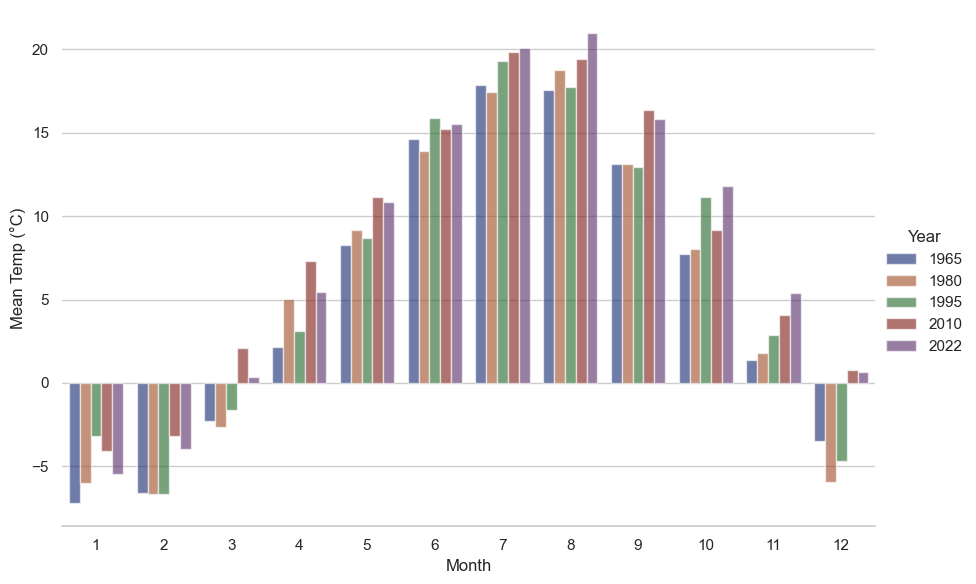

In [16]:
# Evolution of average temperature, month by month, for every 15 years

sns.set_theme(style="whitegrid")

# Draw a nested barplot by month and year
g = sns.catplot(
    data=year_barplot, kind="bar",
    x="Month", y="Mean Temp (°C)", hue="Year",
    errorbar="sd", palette="dark", alpha=.6, height=6, aspect=1.5
)
g.despine(left=True)
g.set_axis_labels('Month', "Mean Temp (°C)")
g.legend.set_title("Year")



As it can be seen from the graph above, the mean temperature has been increasing for all months from 1965 to 2022.

Now, let's evaluate what happened to the Heat Degree Days for the same period.

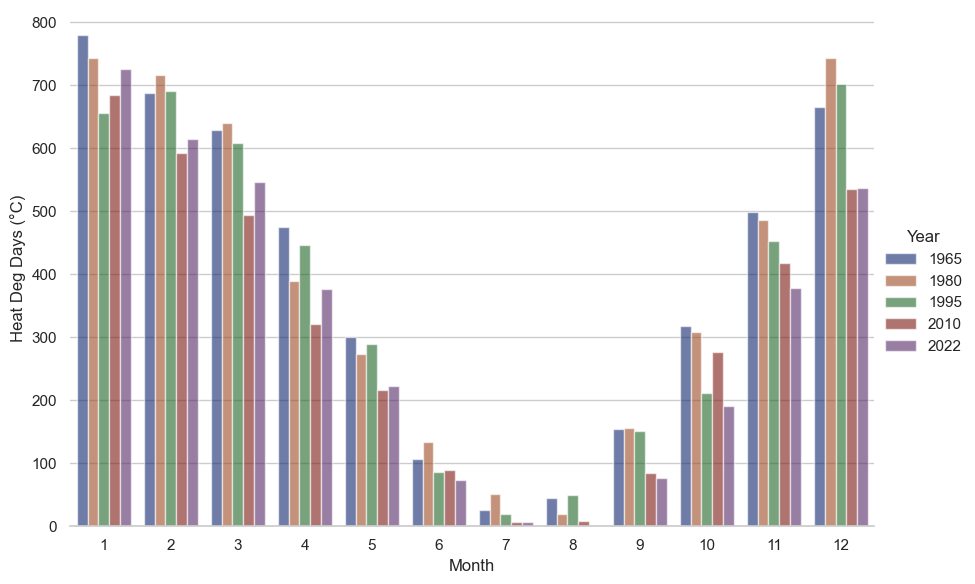

In [17]:
# Evolution of Heat Degree Days, month by month, for every 15 years

sns.set_theme(style="whitegrid")

# Draw a nested barplot by month and year
g = sns.catplot(
    data=year_barplot, kind="bar",
    x="Month", y="Heat Deg Days (°C)", hue="Year",
    errorbar="sd", palette="dark", alpha=.6, height=6, aspect=1.5
)
g.despine(left=True)
g.set_axis_labels('Month', "Heat Deg Days (°C)")
g.legend.set_title("Year")

As the average temperature has been increasing along the years, the Heat Degree Days has decreased. That means that with the climatic change, there is a tendancy for buildings to require less fuel consumption for heating than in the previous years, specially for the winter period. 

# Pycaret - regression model

A prediction model is going to be done to estimate the mean temperature for a certain day based on the month and the year. The dataset going to be used is presented below. 



In [18]:
df

Date/Time  Year  Month  Day  Max Temp (°C)  Min Temp (°C)  \
366    1961-01-01  1961      1    1            4.4           -5.6   
367    1961-01-02  1961      1    2            3.9           -3.9   
368    1961-01-03  1961      1    3           -1.1           -6.7   
369    1961-01-04  1961      1    4           -3.9           -7.2   
370    1961-01-05  1961      1    5           -7.8          -10.6   
...           ...   ...    ...  ...            ...            ...   
23372  2022-12-27  2022     12   27            1.7           -5.6   
23373  2022-12-28  2022     12   28           -2.3           -9.2   
23374  2022-12-29  2022     12   29           -1.5           -5.6   
23375  2022-12-30  2022     12   30            8.0           -2.7   
23376  2022-12-31  2022     12   31           11.6            3.9   

       Mean Temp (°C)  Heat Deg Days (°C)  
366              -0.6                18.6  
367               0.0                18.0  
368              -3.9                21.9  
369              -5.6                23.6  
370              -9.2                27.2  
...               ...                 ...  
23372            -2.0                20.0  
23373            -5.8                23.8  
23374            -3.6                21.6  
23375             2.7                15.3  
23376             7.8                10.2  

[22521 rows x 8 columns]

Before running a regression model, it is important to drop columns that would have colinearity with the dependant variable (mean temperature). If those columns were kept, the fitted regression model would have the tendency of having an R² close to 1.0 and would mislead our predictions. From the dataset used for this analysis, the following columns were removed 'Date/Time','Max Temp (°C)', 'Min Temp (°C)', 'Heat Deg Days (°C)'

In [19]:
pycaret_df = df.drop(['Date/Time','Max Temp (°C)', 'Min Temp (°C)', 'Heat Deg Days (°C)'], axis=1)
pycaret_df

Year  Month  Day  Mean Temp (°C)
366    1961      1    1            -0.6
367    1961      1    2             0.0
368    1961      1    3            -3.9
369    1961      1    4            -5.6
370    1961      1    5            -9.2
...     ...    ...  ...             ...
23372  2022     12   27            -2.0
23373  2022     12   28            -5.8
23374  2022     12   29            -3.6
23375  2022     12   30             2.7
23376  2022     12   31             7.8

[22521 rows x 4 columns]

In [20]:
from pycaret.regression import *

In [21]:
s = setup(data=pycaret_df, target ='Mean Temp (°C)')

It was run a compare_models() funtion to check for the best regression model to this dataset. The best one (highest R²) is the Random Forest Regressor model. This model was used to predict the Mean Temperature (°C). For simplicity and faster running times, the compare_models() function ws no run here below. 

In [22]:
# best = compare_models()

The next step is to create a model for the Random Forest Regressor. As I am using a laptop woth limited hardware capabilities, I have decided to include the function "%%time" to check how long it takes to run this step.

In [23]:
%%time
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Wall time: 1min 18s


## Analyze model

Following the model creation, the model will be analyzed. One of the items to be checked is the feature importance, which shows the parameters that most influence the prediction for the mean temperature. It will also be checked the residuals plot, which shows the difference between the observed value of the target variable (y) and the predicted value (ŷ), i.e. the error of the prediction. 

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

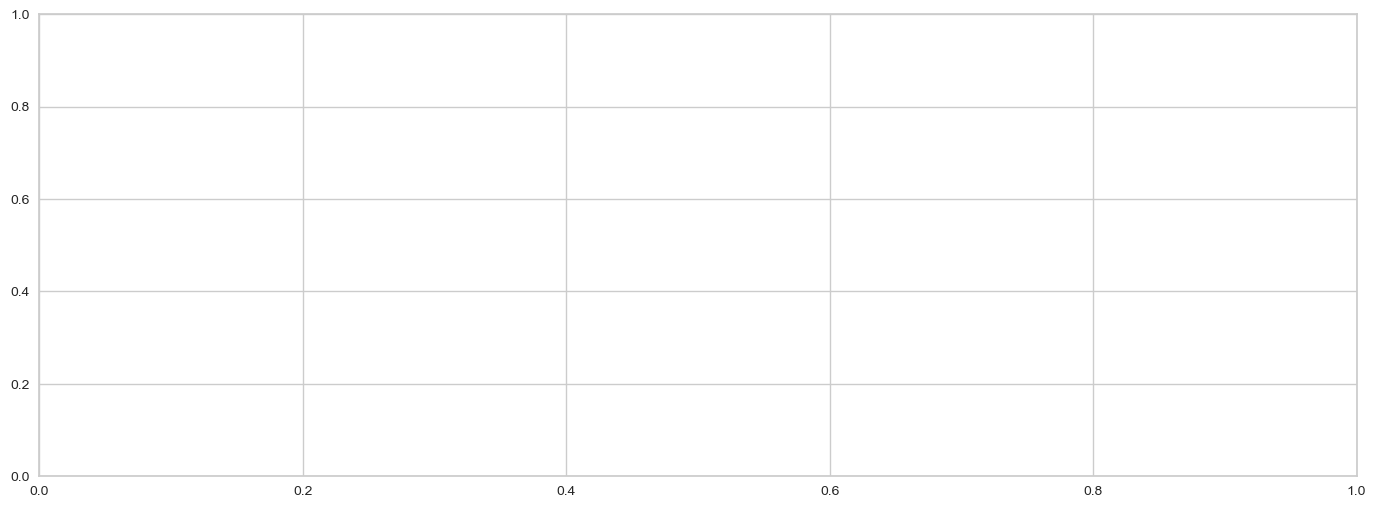

In [24]:
evaluate_model(rf)

The predict_model() function will run the trained model against the test dataset that was set aside on the setup() function above.

In [25]:
predict_model(rf)

Year  Month  Day  Mean Temp (°C)  prediction_label
20564  2015      4   20             4.3             3.478
512    1961      5   27            15.8            10.545
16059  2003     12   20            -3.2             0.123
14698  2000      3   29             7.5             5.367
15863  2003      6    7            15.5            10.220
...     ...    ...  ...             ...               ...
5148   1974      2    4           -10.3            -7.917
18755  2011      5    8            10.9             9.024
4112   1971      4    5             1.1             2.344
18295  2010      2    2           -15.2            -8.089
12105  1993      2   21           -14.5            -5.398

[6757 rows x 5 columns]

This prediction model has a high R² and predicts pretty well the mean temperature for each day, taking also into consideration the month and the year.

After the prediction model is done it is time to save do prediction model so it can be used against a new data set.

In [26]:
save_model(rf,'Mean_Temp_Prediction')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Lacerda\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Year', 'Month', 'Day'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  RandomForestRegressor(n_jobs=-1, random_state=1958))]),
 'Mean_Temp_Prediction.pkl')

# ydata_profiling

Another interesting feature for data exploration is the Library [ydata_profiling](https://ydata-profiling.ydata.ai/docs/master/index.html). It creates an interactive html file with several exploratory data information to help on cleaning and seting up data for analysis. 

An example of the data profiling is presented below with the dataframe ('df') previously cleaned on this project.

In [27]:
from ydata_profiling import ProfileReport

In [28]:
profile = ProfileReport(df)
profile.to_notebook_iframe()
profile.to_file('./Weather_HDD_2.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Yellowbrick

Now we are going to reproduce the Pycaret prediction using Yellowbrick and compare how they behave. Yellowbrick is based on Scikit-Learn and Matplotlib libraries.


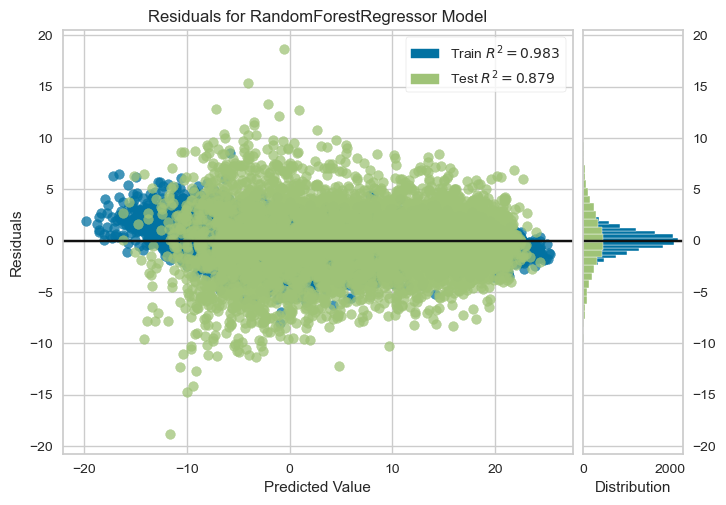

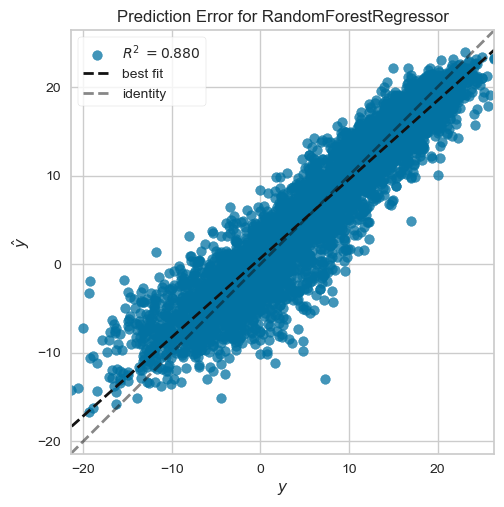

In [29]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline


from yellowbrick.regressor import residuals_plot,PredictionError


# Load the dataset and split into train/test splits
X = pycaret_df[['Year','Month','Day']]
y = pycaret_df['Mean Temp (°C)']

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and show it
viz = residuals_plot(RandomForestRegressor(), X_train, y_train, X_test, y_test)

# Instantiate the linear model and visualizer
model = RandomForestRegressor()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure


# Regression-sklearn-pipeline

It will be created below a regression model using a sklearn pipeline. This pipeline recreates what happens behind the scenes on Pycaret. We'll start by loading a few libraries that will be used.

In [30]:
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

First of all retrieve the clean data set.

In [31]:
# Retrieve the clean dataset
pycaret_df

Year  Month  Day  Mean Temp (°C)
366    1961      1    1            -0.6
367    1961      1    2             0.0
368    1961      1    3            -3.9
369    1961      1    4            -5.6
370    1961      1    5            -9.2
...     ...    ...  ...             ...
23372  2022     12   27            -2.0
23373  2022     12   28            -5.8
23374  2022     12   29            -3.6
23375  2022     12   30             2.7
23376  2022     12   31             7.8

[22521 rows x 4 columns]

Separate some data not seen by the model to be able to test the model later.

In [47]:
# set aside and save unseen data set
data_unseen = pycaret_df.sample(n=7000) #, random_state=42)
data        = pycaret_df.drop(data_unseen.index)
print(f'Data for model: {data.shape},\nData for unseen predictions: {data_unseen.shape}')
data_unseen.to_csv('./data_unseen.csv', index=False)

Data for model: (15521, 4),
Data for unseen predictions: (7000, 4)


We need now to separate the independant variables 'X' from the dependant variable 'y'

In [48]:
X = data.loc[: , data.columns!='Mean Temp (°C)']
y = data.loc[: , data.columns=='Mean Temp (°C)']

Split the data into training and test set. If you want always to the same sample data to test, use random_state and choose a number. In this exercise, we'll separate 20% of data to test the model.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #, random_state=42)

Now we need to encode the data types into numerical columns and categoric columns (any non-numerical data). On the dataset being used for this project there isn't any non-numerical data.

In [50]:
# encoding 
# get the categorical and numeric column names
num_cols = X_train.select_dtypes(exclude=['object']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print(num_cols, '\n', cat_cols)

['Year', 'Month', 'Day'] 
 []


Next step we'll create the prediction pipeline and will divide ir in a numerical pipeline and categorical pipeline. After that we'll combine both numerical and categorical into one single pipeline.

For the pipelines we need to pass in a few parameters:  
1- Add a 'SimpleImputer' which is going to impute values where there are any missing values, using as a strategy the median value calculated from the existing values.  
2- Pass in a 'StandardScaler' that will be standardizing the different numeric values to the same scale. The standard method used is the "z-score".  
3- Pass in a 'OneHotEnconder' that will transform categorical data (string type) into numeric values, allowing for the regression model to be run.  

In [51]:
# pipeline for numerical columns
num_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [52]:
# pipeline for categorical columns
cat_pipe = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='N/A'),
    OneHotEncoder(handle_unknown='ignore', sparse=False)
)
cat_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='N/A', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [53]:
# combine both the pipelines
full_pipe = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])
full_pipe

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Year', 'Month', 'Day']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='N/A',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 [])])

Now it is time to build the model using the Random Forest Regressor, which has been shown previously to be a good fit for the data.

In [54]:
# build the model
rf_mean_temp = make_pipeline(full_pipe, RandomForestRegressor())
rf_mean_temp

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Month', 'Day']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N/A',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [])])),
                ('randomforestregressor', RandomForestRegressor())])

After building the model it is necessary to fit the model to train it.

In [55]:
# train the model
rf_mean_temp.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Month', 'Day']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N/A',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [])])),
                ('randomforestregressor', RandomForestRegressor())])

Make predictions on the test set and check out the results.

In [56]:
# make predictions on the test set
y_pred = rf_mean_temp.predict(X_test)

Measure the accuracy and the mean average error for the predictions done.

In [57]:
y_test['y_pred'] = y_pred
test_scores = y_test.copy()
test_scores


Mean Temp (°C)  y_pred
8198              8.3  13.966
13440             4.7   4.911
6815             15.3  16.832
15327            -1.2  -0.888
15638             2.4   5.636
...               ...     ...
19987            15.6  15.074
14775            13.8  15.814
6333              6.1   9.101
18630            -2.1  -2.822
9224             -0.4   2.751

[3105 rows x 2 columns]

In [58]:
r2 = r2_score(test_scores['Mean Temp (°C)'], test_scores['y_pred'])
mae = mean_absolute_error(test_scores['Mean Temp (°C)'], test_scores['y_pred'])
print(f'R2: {r2}\nmae: {mae}')

R2: 0.8669816326526493
mae: 2.7116621578099838


Save the model as a pickel file.

In [61]:
import joblib
joblib.dump(rf_mean_temp, './Mean_Temp_Prediction2.pkl')
print(rf_mean_temp)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Month', 'Day']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N/A',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                         

Now let's test the prediction model against the 7000 rows of unseen data that we have separated. 

In [60]:
new_dat = pd.read_csv('./data_unseen.csv')
new_dat

Year  Month  Day  Mean Temp (°C)
0     1990      6   25            19.6
1     1979      6   27            14.7
2     2021      1   24            -5.8
3     2010      1   16            -0.4
4     2005      9    3            20.2
...    ...    ...  ...             ...
6995  2001      5   14             8.5
6996  1980      7    7            11.1
6997  1998      7   14            18.7
6998  1997      8    4            16.9
6999  1997      1   12            -6.5

[7000 rows x 4 columns]

In [62]:
model = joblib.load('./Mean_Temp_Prediction2.pkl')
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Month', 'Day']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N/A',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [])])),
                ('randomforestregressor', RandomForestRegressor())])

In [63]:
pred = model.predict(new_dat)

In [66]:
r2 = r2_score(new_dat['Mean Temp (°C)'], pred)
mae = mean_absolute_error(new_dat['Mean Temp (°C)'], pred)
print(f'R2: {r2}\nmae: {mae}')

R2: 0.8526473887290367
mae: 2.8411845714285713


As it can be seen, the predictions run against the unseen data are showing that the model has a good fit and is able to predict the mean temperature within a mean error of 2.84°C.